# Cooled turbine blade

This notebook demonstrates the process of using the Workbench client to upload project files, run scripts, start services, and handle output files.
It also includes launching PyMechanical to solve models and visualize results.

First, import the necessary modules. We import `pathlib` for handling filesystem paths and `os` for interacting with the operating system.
The `launch_workbench` function from `ansys.workbench.core` is imported to start a Workbench session, and `connect_to_mechanical` from `ansys.mechanical.core` to start a Mechanical session.

In [1]:
import os
import pathlib

In [2]:
from ansys.workbench.core import launch_workbench
from ansys.mechanical.core import connect_to_mechanical

Launch the Workbench service on the local machine, using some options.
Define several directories that will be used during the session.
`workdir` is set to the parent directory of the current file.
`assets`, `scripts`, and `wbpz` are subdirectories within the working directory.
The `launch_workbench` function is called to start a Workbench session with specified directory.

In [3]:
workdir = pathlib.Path("__file__").parent

In [4]:
assets = workdir / "assets"
scripts = workdir / "scripts"

In [5]:
wb = launch_workbench(show_gui=True,client_workdir=str(workdir.absolute()), use_insecure_connection=True)

Using insecure connection is not recommended. Please see the documentation for your installed product for additional information.


C:\Users\ansys\actions-runner\_work\pyworkbench-examples\pyworkbench-examples\.venv\Lib\site-packages\ansys\tools\common\cyberchannel.py:187: UserWarning: Starting gRPC client without TLS on localhost:53023. This is INSECURE. Consider using a secure connection.
  warn(f"Starting gRPC client without TLS on {target}. This is INSECURE. Consider using a secure connection.")


Upload the project files to the server using the `upload_file_from_example_repo` method.
The file to upload is `cooled_turbine_blade.wbpz`.

In [6]:
wb.upload_file_from_example_repo("cooled-turbine-blade/wbpz/cooled_turbine_blade.wbpz")

Uploading cooled_turbine_blade.wbpz:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

Uploading cooled_turbine_blade.wbpz: 100%|██████████| 1.18M/1.18M [00:00<00:00, 34.3MB/s]

Execute a Workbench script (`project.wbjn`) to define the project and load the geometry using the `run_script_file` method.
The `set_log_file` method is used to direct the logs to `wb_log_file.log`.
The name of the system created is stored in `sys_name` and printed.

In [7]:
log_path = 'wblog.txt'
wb.set_log_file(log_path)
sys_name = wb.run_script_file(str(assets / "project.wbjn"), log_level='info')
print(sys_name)

SYS


Start a PyMechanical server for the system using the `start_mechanical_server` method.
Create a PyMechanical client session connected to this server using `connect_to_mechanical`.
The project directory is printed to verify the connection.

In [8]:
server_port = wb.start_mechanical_server(system_name=sys_name)

In [9]:
mechanical = connect_to_mechanical(ip='localhost', port=server_port)

In [10]:
print(mechanical.project_directory)

C:\Users\ansys\AppData\Local\Tempwbpj\example_02_Cooled_Turbine_Blade_files\


Read and execute the script `cooled_turbine_blade.py` via the PyMechanical client using `run_python_script`.
This script typically contains commands to mesh and solve the turbine blade model.
The output of the script is printed.

In [11]:
with open(scripts / "cooled_turbine_blade.py") as sf:
    mech_script = sf.read()
mech_output = mechanical.run_python_script(mech_script)
print(mech_output)

{"Stress": "2802182020.5917487 [Pa]"}


Specify the Mechanical directory and run a script to fetch the working directory path.
The path where all solver files are stored on the server is printed.
Download the solver output file (`solve.out`) from the server to the client's current working directory and print its contents.

In [12]:
mechanical.run_python_script(f"solve_dir=ExtAPI.DataModel.AnalysisList[1].WorkingDir")

''

In [13]:
result_solve_dir_server = mechanical.run_python_script(f"solve_dir")
print(f"All solver files are stored on the server at: {result_solve_dir_server}")

All solver files are stored on the server at: C:\Users\ansys\AppData\Local\Tempwbpj\example_02_Cooled_Turbine_Blade_files\dp0\SYS-8\MECH\


In [14]:
solve_out_path = os.path.join(result_solve_dir_server, "solve.out")

In [15]:
def write_file_contents_to_console(path):
    """Write file contents to console."""
    with open(path, "rt") as file:
        for line in file:
            print(line, end="")

In [16]:
current_directory = os.getcwd()
mechanical.download(solve_out_path, target_dir=current_directory)
solve_out_local_path = os.path.join(current_directory, "solve.out")
write_file_contents_to_console(solve_out_local_path)
os.remove(solve_out_local_path)


 Ansys Mechanical Enterprise                       


 *------------------------------------------------------------------*
 |                                                                  |
 |   W E L C O M E   T O   T H E   A N S Y S (R)  P R O G R A M     |
 |                                                                  |
 *------------------------------------------------------------------*




 ***************************************************************
 *         ANSYS MAPDL 2025 R2          LEGAL NOTICES          *
 ***************************************************************
 *                                                             *
 * Copyright 1971-2025 Ansys, Inc.  All rights reserved.       *
 * Unauthorized use, distribution or duplication is            *
 * prohibited.                                                 *
 *                                                             *
 * Ansys is a registered trademark of Ansys, Inc. or its       *
 * sub

 SET PARAMETER DIMENSIONS ON  _WB_SOLVERFILES_DIR
  TYPE=STRI  DIMENSIONS=      248        1        1

 PARAMETER _WB_SOLVERFILES_DIR(1) = C:\Users\ansys\AppData\Local\Tempwbpj\example_02_Cooled_Turbine_Blade_files\dp0\SYS-8\MECH\

 SET PARAMETER DIMENSIONS ON  _WB_USERFILES_DIR
  TYPE=STRI  DIMENSIONS=      248        1        1

 PARAMETER _WB_USERFILES_DIR(1) = C:\Users\ansys\AppData\Local\Tempwbpj\example_02_Cooled_Turbine_Blade_files\user_files\
 --- Data in consistent MKS units. See Solving Units in the help system for more

 MKS UNITS SPECIFIED FOR INTERNAL    
  LENGTH        (l)  = METER (M)
  MASS          (M)  = KILOGRAM (KG)
  TIME          (t)  = SECOND (SEC)
  TEMPERATURE   (T)  = CELSIUS (C)
  TOFFSET            = 273.0
  CHARGE        (Q)  = COULOMB
  FORCE         (f)  = NEWTON (N) (KG-M/SEC2)
  HEAT               = JOULE (N-M)

  PRESSURE           = PASCAL (NEWTON/M**2)
  ENERGY        (W)  = JOULE (N-M)
  POWER         (P)  = WATT (N-M/SEC)
  CURRENT       (i)  = AM

Specify the Mechanical directory path for images and run a script to fetch the directory path.
The path where images are stored on the server is printed.
Download an image file (`stress.png`) from the server to the client's current working directory and display it using `matplotlib`.

In [17]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

In [18]:
mechanical.run_python_script(f"image_dir=ExtAPI.DataModel.AnalysisList[1].WorkingDir")

''

In [19]:
result_image_dir_server = mechanical.run_python_script(f"image_dir")
print(f"Images are stored on the server at: {result_image_dir_server}")

Images are stored on the server at: C:\Users\ansys\AppData\Local\Tempwbpj\example_02_Cooled_Turbine_Blade_files\dp0\SYS-8\MECH\


In [20]:
def get_image_path(image_name):
    return os.path.join(result_image_dir_server, image_name)

In [21]:
def display_image(path):
    print(f"Printing {path} using matplotlib")
    image1 = mpimg.imread(path)
    plt.figure(figsize=(15, 15))
    plt.axis("off")
    plt.imshow(image1)
    plt.show()

In [22]:
image_name = "stress.png"
image_path_server = get_image_path(image_name)

Local image path : C:\Users\ansys\actions-runner\_work\pyworkbench-examples\pyworkbench-examples\pyworkbench-examples\doc\source\examples\cooled-turbine-blade\stress.png
Printing C:\Users\ansys\actions-runner\_work\pyworkbench-examples\pyworkbench-examples\pyworkbench-examples\doc\source\examples\cooled-turbine-blade\stress.png using matplotlib


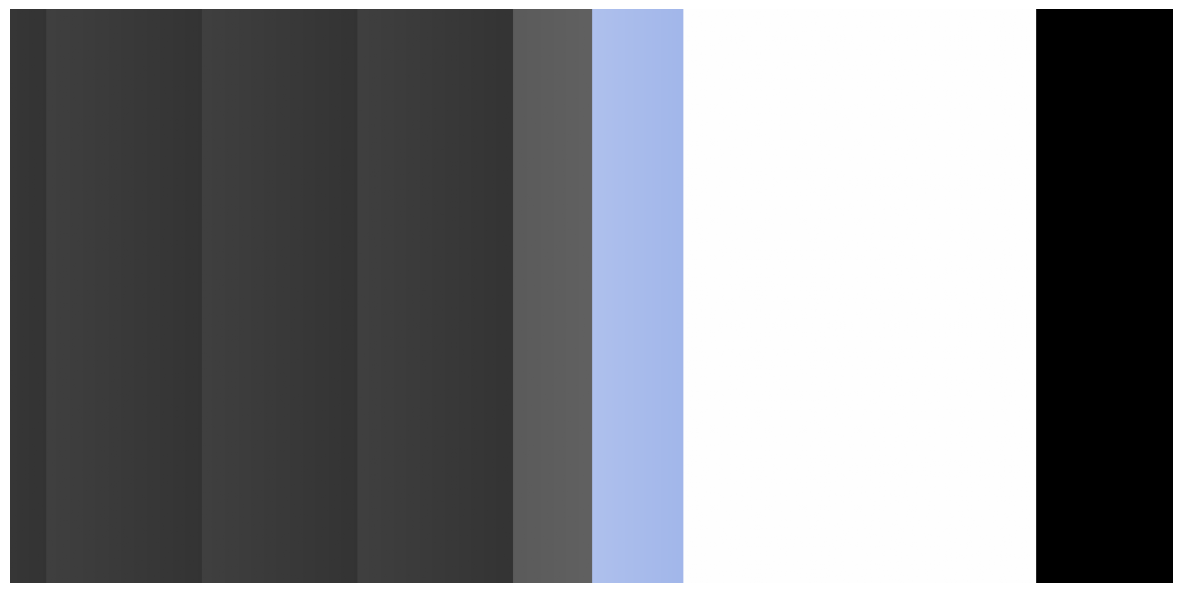

In [23]:
if image_path_server != "":
    local_file_path_list = mechanical.download(
        image_path_server, target_dir=current_directory
    )
    image_local_path = local_file_path_list[0]
    print(f"Local image path : {image_local_path}")

    display_image(image_local_path)

Download all the files from the server to the current working directory.
Verify the target and source paths and copy all files from the server to the client.

In [24]:
import shutil
import glob

In [25]:
target_dir2 = current_directory
print(f"Files to be copied from server path at: {target_dir2}")

Files to be copied from server path at: C:\Users\ansys\actions-runner\_work\pyworkbench-examples\pyworkbench-examples\pyworkbench-examples\doc\source\examples\cooled-turbine-blade


In [26]:
print(f"All the solver file is stored on the server at: {result_solve_dir_server}")

All the solver file is stored on the server at: C:\Users\ansys\AppData\Local\Tempwbpj\example_02_Cooled_Turbine_Blade_files\dp0\SYS-8\MECH\


In [27]:
source_dir = result_solve_dir_server
destination_dir = target_dir2

In [28]:
for file in glob.glob(source_dir + '/*'):
    shutil.copy(file, destination_dir)

Finally, the `exit` method is called on both the PyMechanical and Workbench clients to gracefully shut down the services, ensuring that all resources are properly released.

In [29]:
mechanical.exit()
wb.exit()

ERROR:root:Error when running the script: CommandFailedException: An attempt to restore the project to its original state has failed because some files and/or directories may be in use by other program, or disk is full or the files are read-only. You must make sure these files are not currently in use, disk is not full, and project directory has write permission.
